# Исследование сервиса аренды самокатов GoFast

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. 

Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 

Сервисом можно пользоваться:
* без подписки
  * абонентская плата отсутствует;
  * стоимость одной минуты поездки — 8 рублей;
  * стоимость старта (начала поездки) — 50 рублей;
* с подпиской Ultra
  * абонентская плата — 199 рублей в месяц;
  * стоимость одной минуты поездки — 6 рублей;
  * стоимость старта — бесплатно.

# План выполнения проекта

1. Откроем файл с данными и изучить общую информацию:   
    1. Загрузим данные из файлов в датафрейм;
    2. Изумть общую информацию о каждом датафрейме.


2. Проведем предобработка данных:
    1. Приведем столбец date к типу даты pandas;
    0. Создадим новый столбец с номером месяца на основе столбца date;
    0. Проверим наличие пропущенных значений и дубликатов в датафреймах. Обработаем их, если такие значения присутствуют.


3. Проведем исследовательский анализ данных:

    Опишем и визуализируем общую информацию о пользователях и поездках:
    * частота встречаемости городов;
    * соотношение пользователей с подпиской и без подписки;
    * возраст пользователей;
    * расстояние, которое пользователь преодолел за одну поездку;
    * продолжительность поездок.

4. Проведем объединение данных:

    1. Объединим данные о пользователях, поездках и подписках в один датафрейм;
    0. Создадим ещё два датафрейма из датафрейма:
        * c данными о пользователях без подписки;
        * с данными о пользователях с подпиской.
    3. Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

5. Подсчитаем выручку:

    1. Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
    0. В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. 

6. Проверим гипотезы:

    Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов:
    1. Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу;
    0. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу;
    0. Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

7. Напишем общий вывод.

# Описание данных

В основных данных есть информация о пользователях, их поездках и подписках.

Пользователи — `users_go.csv`

* `user_id` — уникальный идентификатор пользователя
* `name` — имя пользователя
* `age` — возраст
* `city` — город
* `subscription_type` — тип подписки (free, ultra)

Поeздки — `rides_go.csv`

* `user_id` — уникальный идентификатор пользователя
* `distance` — расстояние, которое пользователь проехал в текущей сессии (в метрах)
* `duration` — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
* `date` — дата совершения поездки

Подписки — `subscriptions_go.csv`

* `subscription_type` — тип подписки
* `minute_price` — стоимость одной минуты поездки по данной подписке
* `start_ride_price` — стоимость начала поездки
* `subscription_fee` — стоимость ежемесячного платежа

# Импортируем библиотеки

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from scipy.stats import binom, poisson
from math import sqrt

## Загрузка данных
### Загрузим таблицу с пользователями `users_go.csv`:

In [5]:
data_1 = 'users_go.csv'
data_2 = 'https://code.s3.yandex.net/datasets/users_go.csv'

if os.path.exists(data_1):
    data_users_go = pd.read_csv(data_1)
elif os.path.exists(data_2):
    data_users_go = pd.read_csv(data_2)
else:
    print('Something is wrong')

Выведем основную информацию о датафрейме с помощью метода `info()`:

In [8]:
data_users_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Выведем первые 10 строчек датафрейма `data_users_go` на экран:

In [10]:
data_users_go.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


### Оценим распределение пользователей по:
* возрасту
* городу
* типу подписки

Также оценим зависимость возраста и типа подписки.

#### Оценим распределение пользователей по возрасту:

Построим гистограмму распределение пользователей по возрасту:

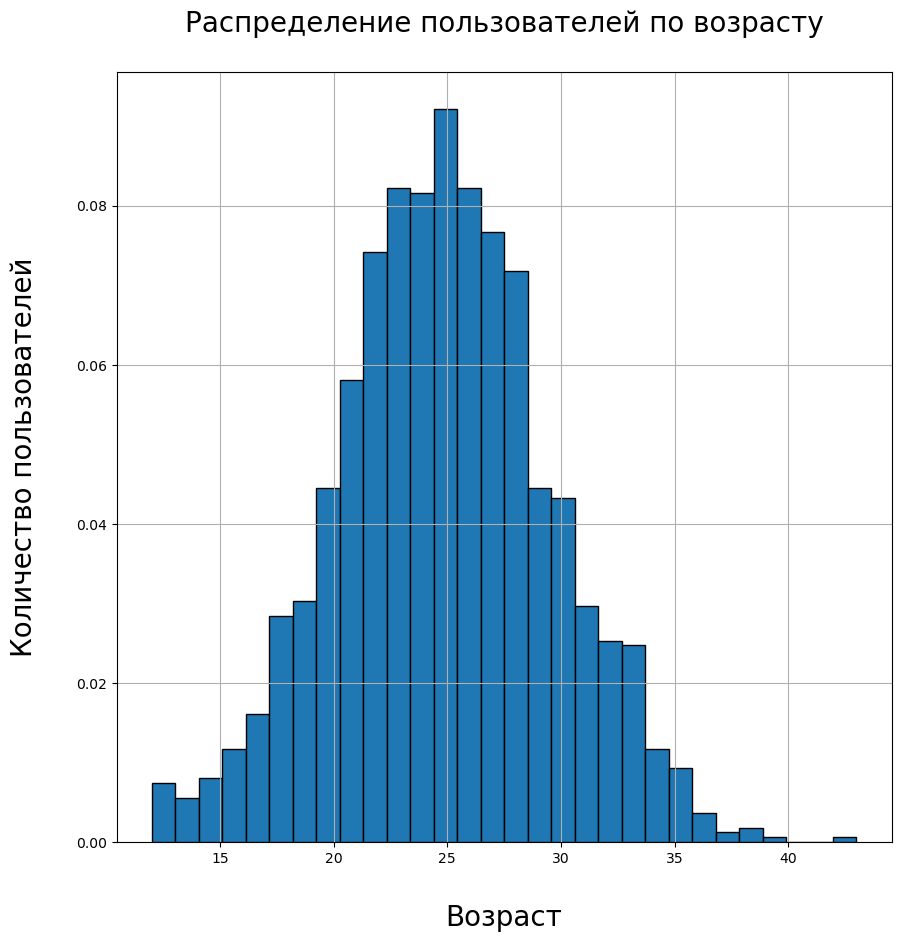

In [15]:
plt.figure(figsize=(10,10))
plt.hist(data_users_go['age'], bins=30, density=True, edgecolor='black')
plt.title('Распределение пользователей по возрасту' + "\n", size=20)
plt.xlabel("\n" + 'Возраст', size=20)
plt.ylabel('Количество пользователей' + "\n", size=20)
plt.grid()
plt.show()

Применим метод `describe`, чтобы зафиксировать заметные на гистограмме нюансы распределения в числах:

In [16]:
data_users_go['age'].describe()

count    1565.000000
mean       24.922045
std         4.553496
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

#### Оценим распределение пользователей по городам:

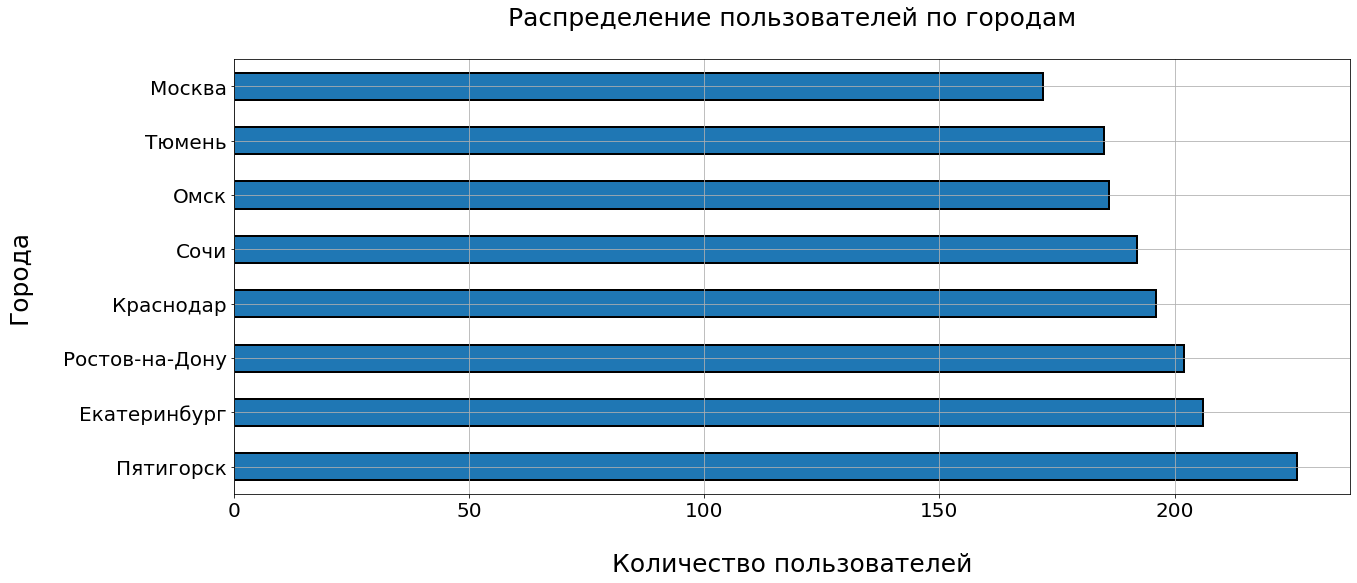

In [7]:
data_users_go['city'].value_counts().plot(kind = 'barh', 
    figsize = (20,8), 
    edgecolor='black', 
    legend = False, 
    fontsize = 20,
    linewidth = 2
    ).set_title('Распределение пользователей по городам' + "\n", fontsize = 25);
plt.grid()
plt.xlabel("\n" + 'Количество пользователей', size=25);
plt.ylabel('Города' + "\n", size = 25);

Зафиксируем заметные на столбиковой гистограмме значения распределения в числах:

In [17]:
data_users_go['city'].value_counts()

city
Пятигорск         226
Екатеринбург      206
Ростов-на-Дону    202
Краснодар         196
Сочи              192
Омск              186
Тюмень            185
Москва            172
Name: count, dtype: int64

#### Оценим распределение пользователей по типу подписки:

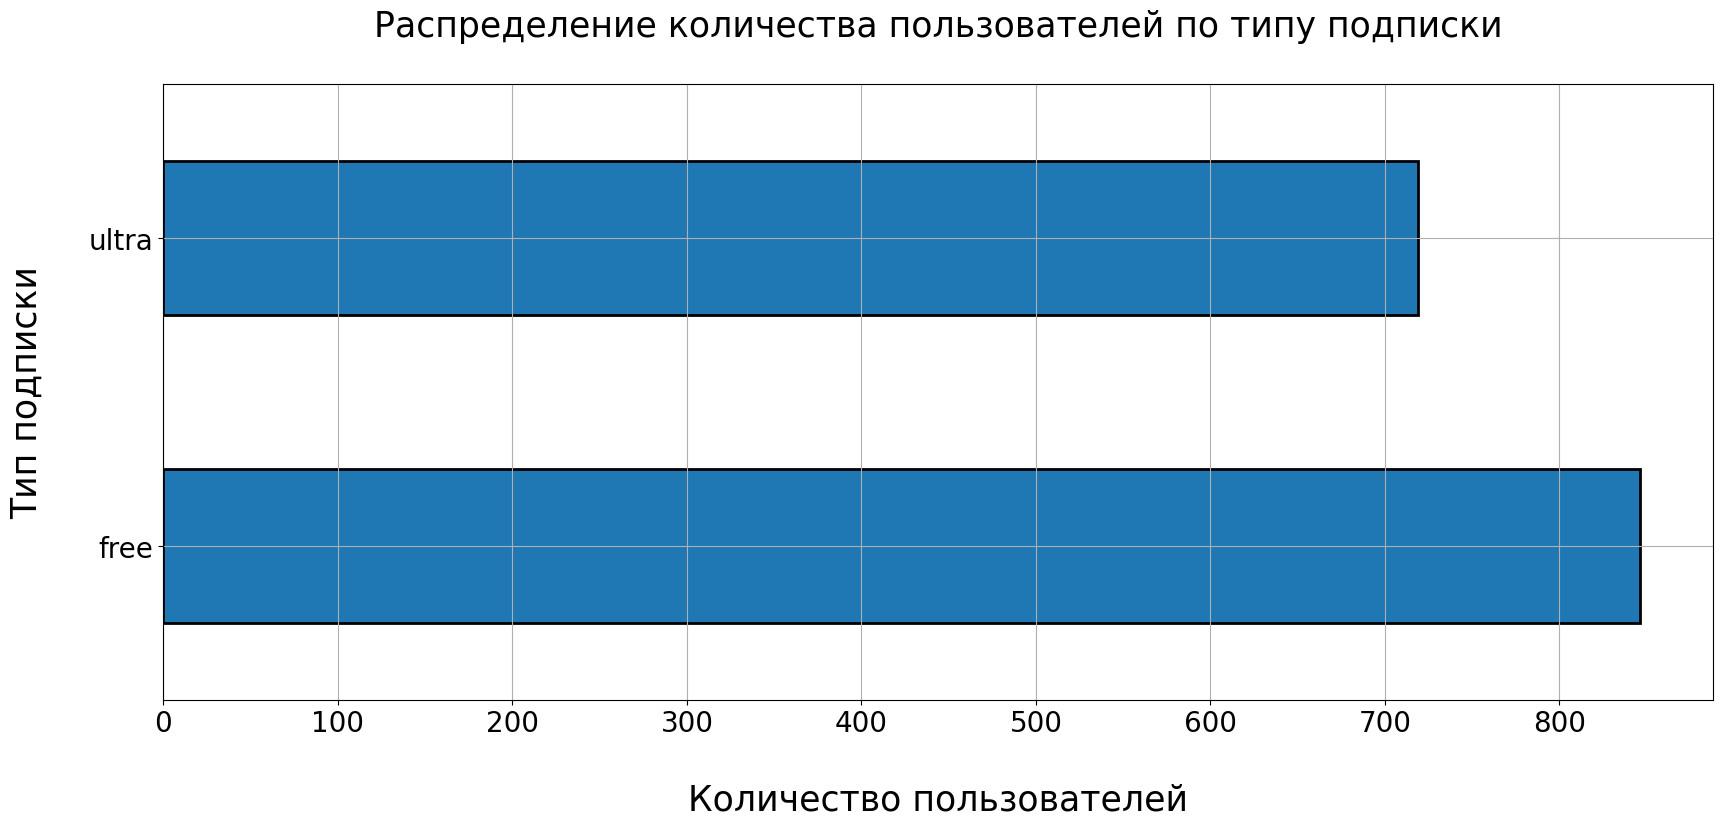

In [18]:
data_users_go['subscription_type'].value_counts().plot(kind = 'barh', 
    figsize = (20,8), 
    edgecolor='black', 
    legend = False, 
    fontsize = 20,
    linewidth = 2
    ).set_title('Распределение количества пользователей по типу подписки' + "\n", fontsize = 25);
plt.grid()
plt.xlabel("\n" + 'Количество пользователей', size=25);
plt.ylabel('Тип подписки' + "\n", size = 25);

Зафиксируем заметные на столбиковой гистограмме значения распределения в числах:

In [19]:
data_users_go['subscription_type'].value_counts()

subscription_type
free     846
ultra    719
Name: count, dtype: int64

#### Оценим зависимость возраста и типа подписки:

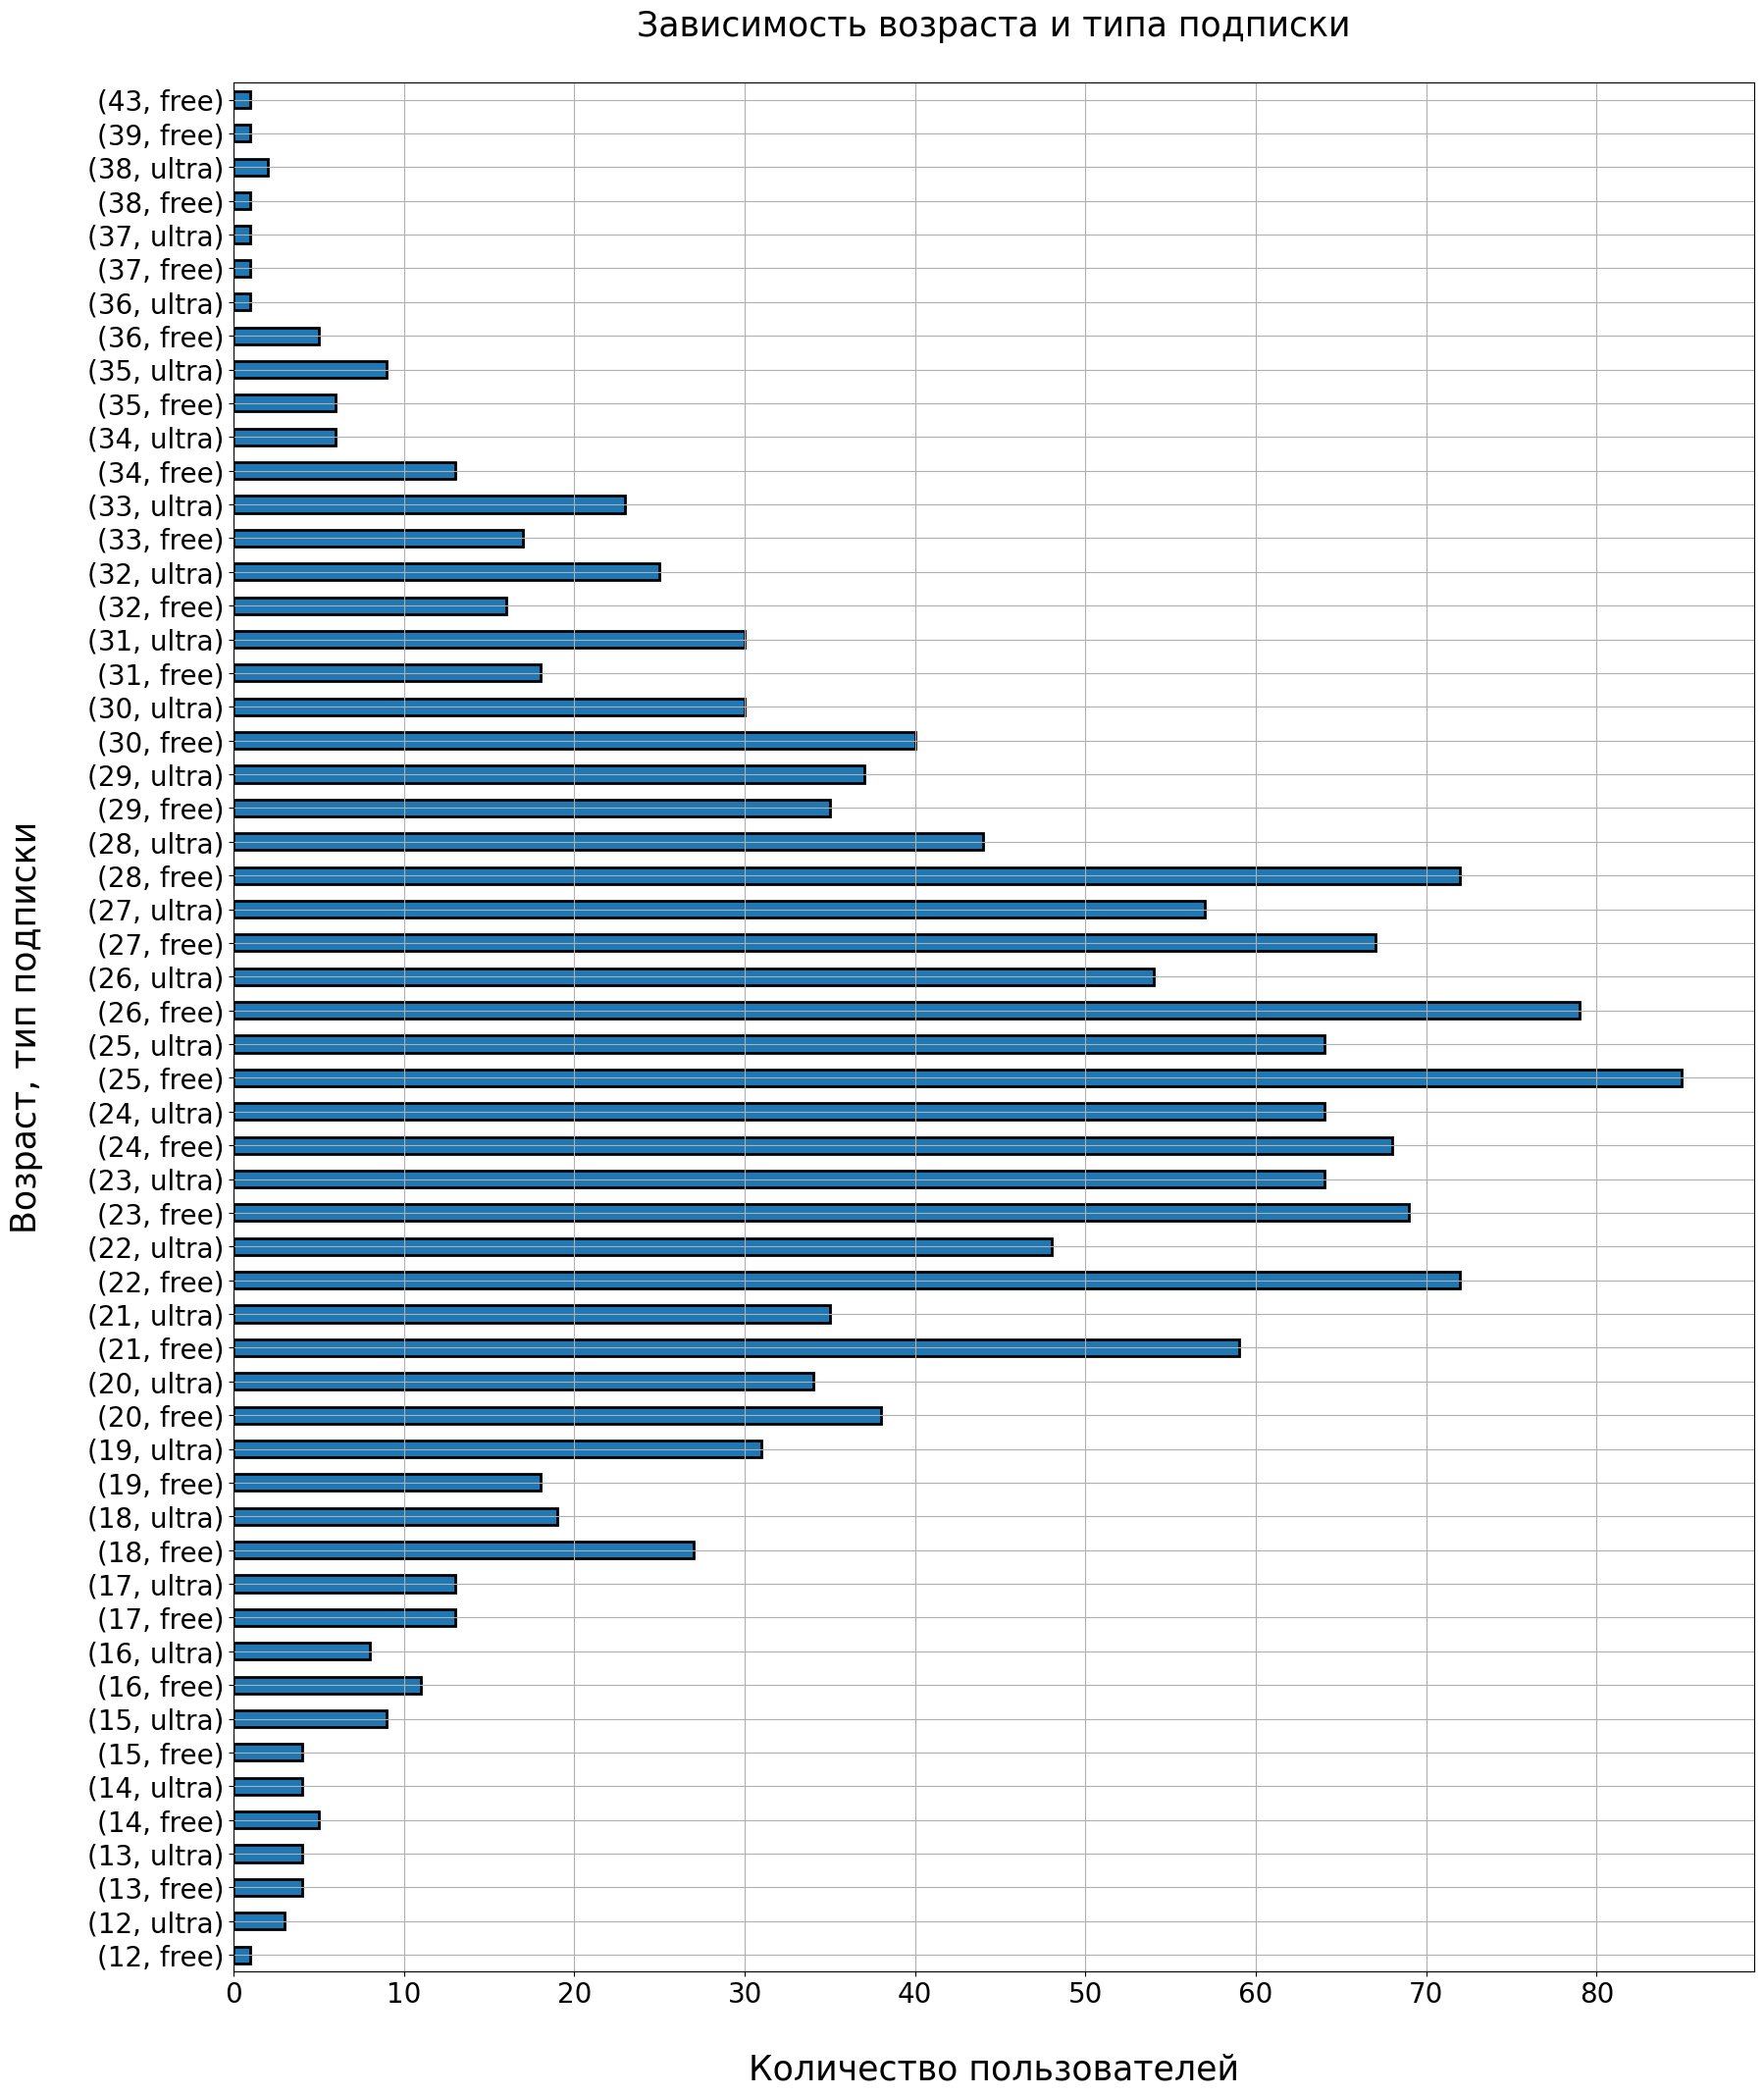

In [20]:
data_users_go.groupby(['age', 'subscription_type'])['subscription_type'].count().plot(kind = 'barh', 
    figsize = (20,25), 
    edgecolor='black', 
    legend = False, 
    fontsize = 20,
    linewidth = 2
    ).set_title('Зависимость возраста и типа подписки' + "\n", fontsize = 25);
plt.grid()
plt.xlabel("\n" + 'Количество пользователей', size=25);
plt.ylabel('Возраст, тип подписки' + "\n", size = 25);

### Загрузим таблицу с поeздками `rides_go.csv`:

In [21]:
data_3 = 'rides_go.csv'
data_4 = 'https://code.s3.yandex.net/datasets/rides_go.csv'

if os.path.exists(data_3):
    data_riders_go = pd.read_csv(data_3)
elif os.path.exists(data_4):
    data_riders_go = pd.read_csv(data_4)
else:
    print('Something is wrong')

Выведем основную информацию о датафрейме с помощью метода info():

In [22]:
data_riders_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Выведем первые 10 строчек датафрейма `data_riders_go` на экран:

In [24]:
data_riders_go.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


Выведем топ 5 лидеров по количеству поездок:

In [25]:
data_riders_go.groupby(['user_id'])['user_id'].agg('count').sort_values(ascending=False).head(5)

user_id
1236    27
783     26
1063    26
1204    24
1149    23
Name: user_id, dtype: int64

Выведем топ 5 лидеров по расстоянию, которое пользователь проехал (в метрах) и укажем суммарное время (`duration` в минутах):

In [26]:
data_riders_go.groupby(['user_id']).sum().sort_values(by='distance', ascending=False).head(5)

,distance,duration,date
user_id,,,
1063,79325.846482,440.533761,2021-01-232021-02-192021-02-262021-03-102021-0...
1236,78744.976586,446.233013,2021-01-152021-01-242021-02-042021-02-102021-0...
1361,77773.501423,408.979310,2021-01-252021-01-272021-02-062021-02-232021-0...
1468,77392.080789,429.513327,2021-01-122021-01-142021-02-272021-03-162021-0...
1374,74901.673366,394.418821,2021-01-072021-01-232021-02-072021-02-072021-0...


### Загрузим таблицу с подписками `subscriptions_go.csv`

In [27]:
data_5 = 'subscriptions_go.csv'
data_6 = 'https://code.s3.yandex.net/datasets/subscriptions_go.csv'

if os.path.exists(data_5):
    data_subscriptions_go = pd.read_csv(data_5)
elif os.path.exists(data_6):
    data_subscriptions_go = pd.read_csv(data_6)
else:
    print('Something is wrong')

Выведем основную информацию о датафрейме с помощью метода info():

In [29]:
data_subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Выведем строки датафрейма на экран:

In [31]:
data_subscriptions_go

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


### Вывод после изучения данных

Считали CSV-файлы с данными с помощью библиотеки pandas и сохранили их в датафреймы.

Вывели первые строки каждого набора данных. Изучили общую информацию о каждом датафрейме. Загрузили, построили гистограммы и рассмотрели данные.

По данным можно отметить следующие выводы:
* Основные пользователи - люди от `20` до `30` лет, самые активные пользователи - люди `25` лет
* Распределение пользователей по городам практически одинаковое:
  * Наибольшее количество пользователей в Пятигорске (`226`)
  * Наименьшее в Москве (`172`)
* Преобладают пользователи с бесплатным тарифом (`846`) против (`719`), что составляет около `54`%
* Люди разных возростов сбалансированны по типам групп подписок 


## Проведем предобработку данных:

Как можно заметить данные столбца `date` имеют тип `object`.

### Приведем столбец `date` из датафрейма `data_riders_go` к типу `datetime`:

In [32]:
data_riders_go['date'] = pd.to_datetime(data_riders_go['date'], format = '%Y-%m-%d')

Проверим, что изменения вступили в силу:

In [33]:
data_riders_go['date'].head()

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
Name: date, dtype: datetime64[ns]

In [34]:
data_riders_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


### Создадим новый столбец с номером месяца `month` на основе столбца `date`:

Сначала проверим, за какой период предоставлены данные. Если данные предоставлены за несколько лет, то они могут попасть в один и тот же месяц.


In [35]:
data_riders_go['date'].dt.year.unique()

array([2021])

Данные предоставлены только за один год, соответственно ошибок не будет, добавим номер месяца в соответствующий столбец `month`:

In [36]:
data_riders_go['month'] = data_riders_go['date'].dt.month

Проверим, что изменения вступили в силу:

In [37]:
data_riders_go.head(10)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
5,1,2770.890808,16.650138,2021-10-09,10
6,1,3039.020292,14.927879,2021-10-19,10
7,1,2842.118050,23.117468,2021-11-06,11
8,1,3412.690668,15.238072,2021-11-14,11
9,1,748.690645,15.041884,2021-11-22,11


### Проверим наличие пропущенных значений и дубликатов в датафреймах. Обработаем их, если такие значения присутствуют:

Так как в таблице `data_subscriptions_go` нет необходимости делать данную проверку, проверку осуществим в двух таблицах, а именно:
* `data_users_go`
* `data_riders_go`


In [38]:
data_users_go

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra


Таблица с пользователями (Пропущенные значения):

In [39]:
data_users_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Таблица с пользователями (Явные дубликаты):

In [41]:
data_users_go.duplicated().sum()

31

Пожертвуем 2-мя % данных и удалим 31 явный дубликат:

In [42]:
data_users_go.drop_duplicates(inplace=True)

Проверим, что изменения вступили в силу:

In [43]:
data_users_go.duplicated().sum()

0

Таблица с поездками (Пропущенные значения):

In [44]:
data_riders_go.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

Таблица с поездками (Явные дубликаты):

In [45]:
data_riders_go.duplicated().sum()

0

### Вывод после предобработки данных

* Привели столбец `date` к типу даты (`datetime`) `pandas`.
* Создали новый столбец (`month`) с номером месяца на основе столбца `date`.
* Проверли наличие пропущенных значений и дубликатов в датафреймах и обработали их.

По данным можно отметить следующие выводы:

* Пропущенных данных в таблицах нет.
* Дубликаты имеются среди пользователей (`31` строка), пожертвовали `2-мя` % данных и удалили `31` явный дубликат.

## Исследовательский анализ данных.

### Опишем и визуализируем общую информацию о пользователях и поездках: 

#### Частота встречаемости городов:

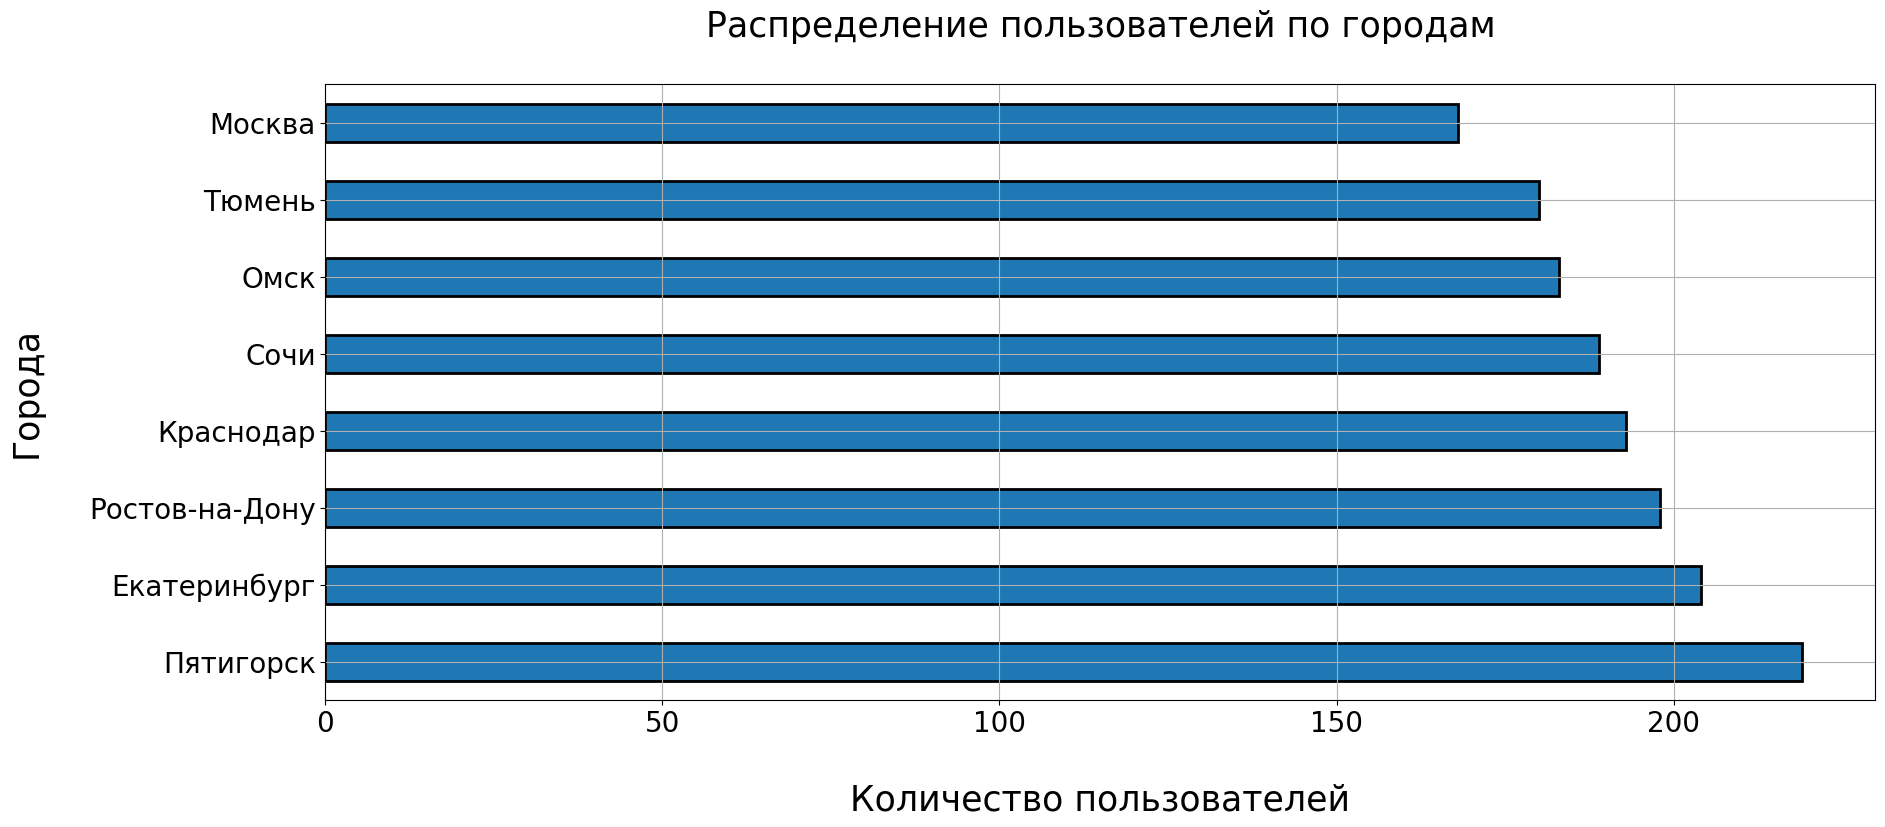

In [46]:
data_users_go['city'].value_counts().plot(kind = 'barh', 
    figsize = (20,8), 
    edgecolor='black', 
    legend = False, 
    fontsize = 20,
    linewidth = 2
    ).set_title('Распределение пользователей по городам' + "\n", fontsize = 25);
plt.grid()
plt.xlabel("\n" + 'Количество пользователей', size=25);
plt.ylabel('Города' + "\n", size = 25);

Зафиксируем заметные на столбиковой гистограмме значения распределения в числах:

In [47]:
data_users_go['city'].value_counts()

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

#### Соотношение пользователей с подпиской и без подписки:

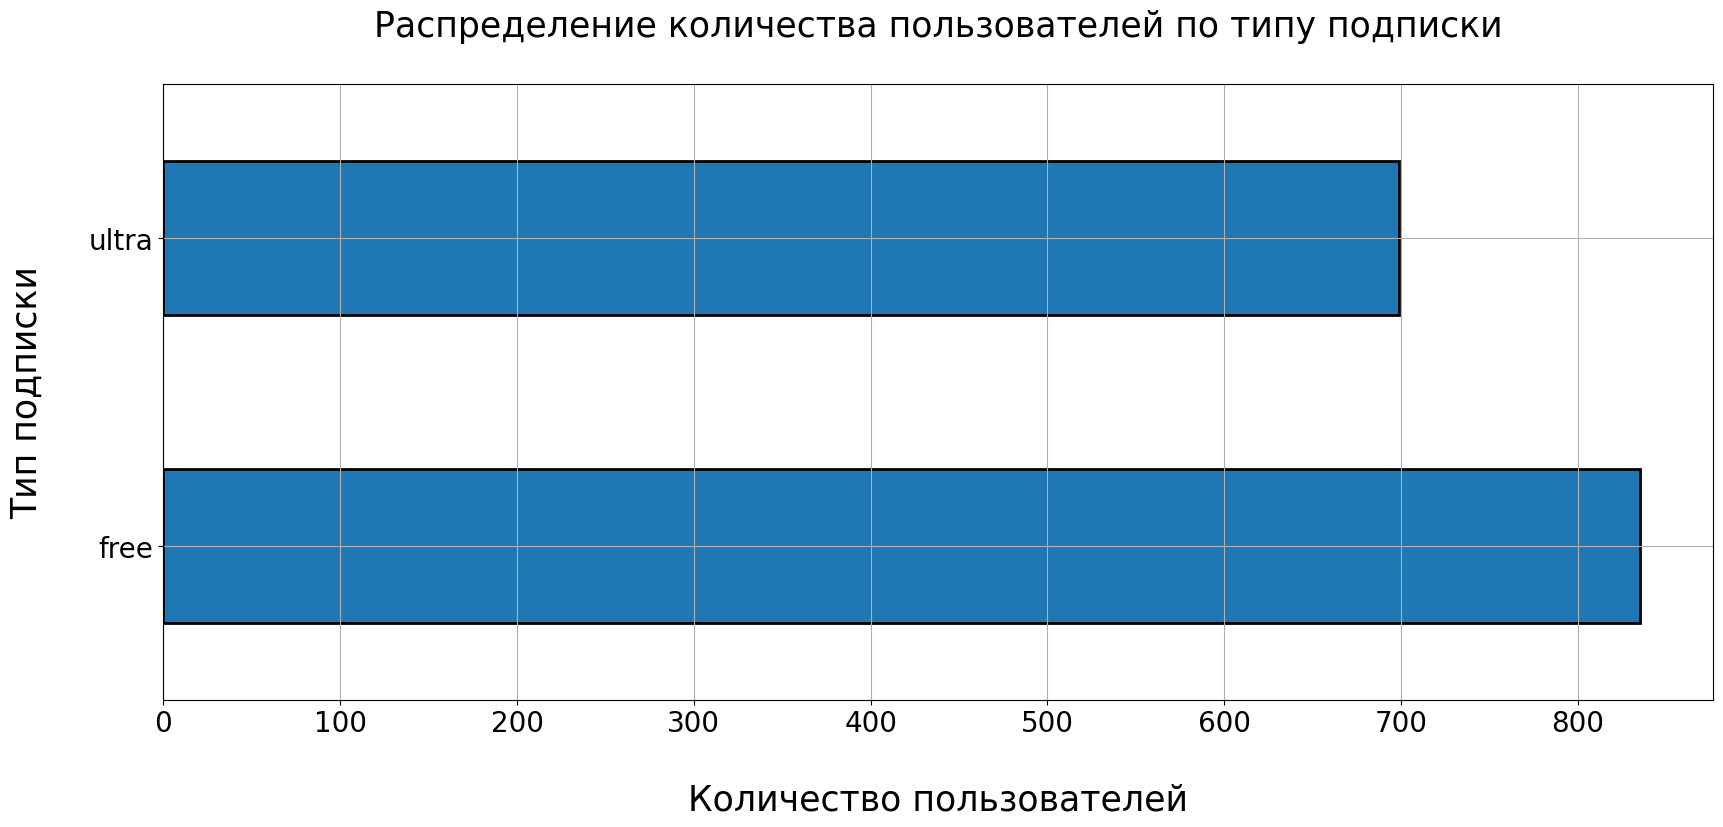

In [48]:
data_users_go['subscription_type'].value_counts().plot(kind = 'barh', 
    figsize = (20,8), 
    edgecolor='black', 
    legend = False, 
    fontsize = 20,
    linewidth = 2
    ).set_title('Распределение количества пользователей по типу подписки' + "\n", fontsize = 25);
plt.grid()
plt.xlabel("\n" + 'Количество пользователей', size=25);
plt.ylabel('Тип подписки' + "\n", size = 25);

Зафиксируем заметные на столбиковой гистограмме значения распределения в числах:

In [49]:
data_users_go['subscription_type'].value_counts()

subscription_type
free     835
ultra    699
Name: count, dtype: int64

In [96]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return f"{round(pct, 2)}%\n({absolute} пользователей)"

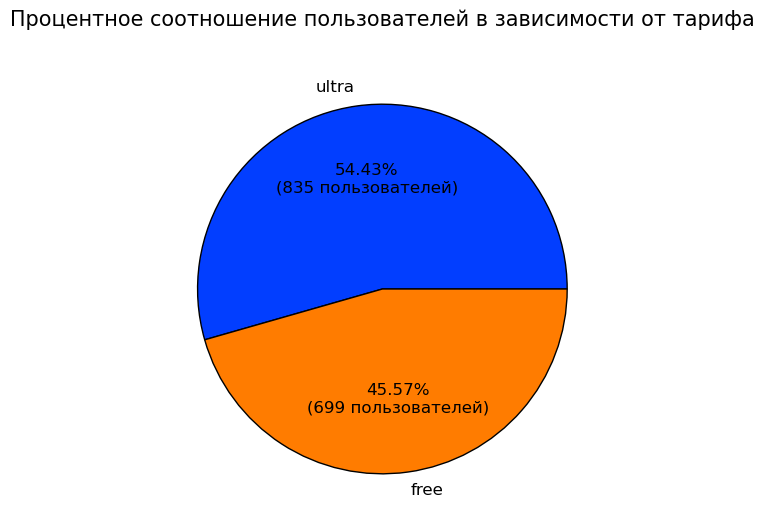

In [97]:
colors = sns.color_palette('bright')[0:2]
plt.figure(figsize=(6,6))
plt.title('Процентное соотношение пользователей в зависимости от тарифа' + "\n", size=15)
plt.pie(data_users_go['subscription_type'].value_counts(), 
        textprops={'fontsize': 12},
        labels = data_users_go['subscription_type'].unique(),
        autopct = lambda pct: func(pct, data_users_go['subscription_type'].value_counts()),
        wedgeprops=dict(width=1, edgecolor='black'), 
        colors = colors)
plt.show() 

#### Возраст пользователей:

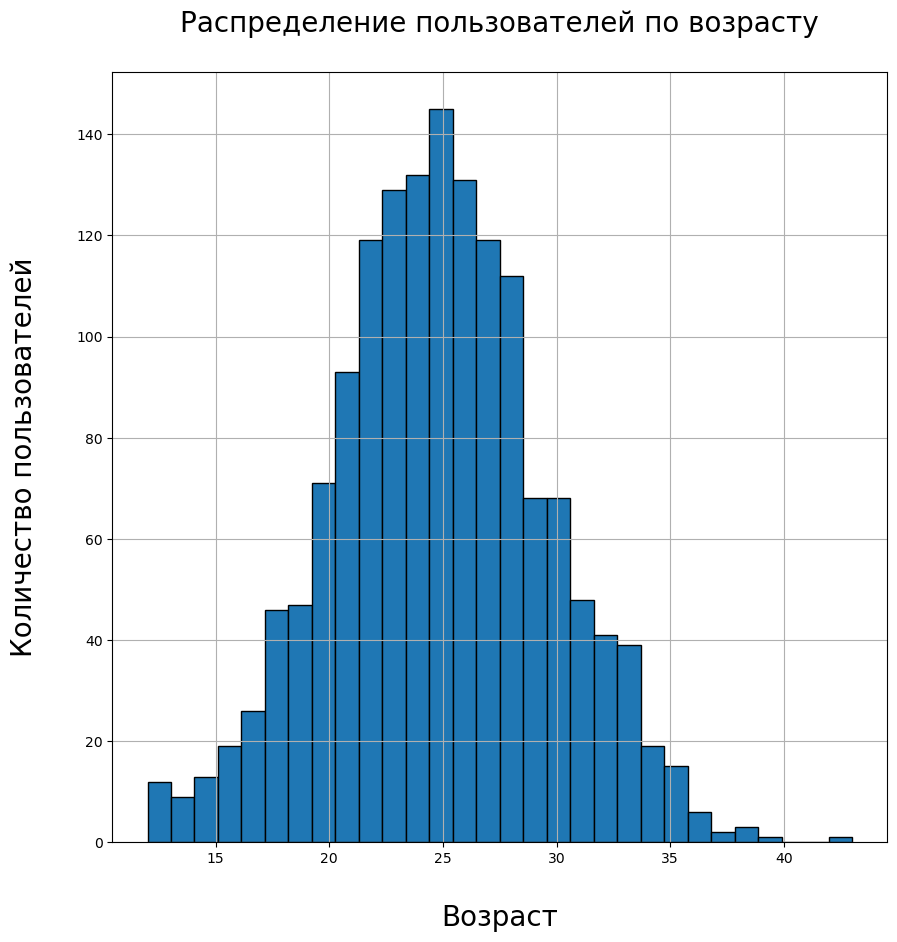

In [57]:
plt.figure(figsize=(10,10))
plt.hist(data_users_go['age'], bins=30, edgecolor='black')
plt.title('Распределение пользователей по возрасту' + "\n", size=20)
plt.xlabel("\n" + 'Возраст', size=20)
plt.ylabel('Количество пользователей' + "\n", size=20)
plt.grid()
plt.show()

Применим метод `describe`, чтобы зафиксировать заметные на гистограмме нюансы распределения в числах:

In [58]:
data_users_go['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

#### Расстояние, которое пользователь преодолел за одну поездку:

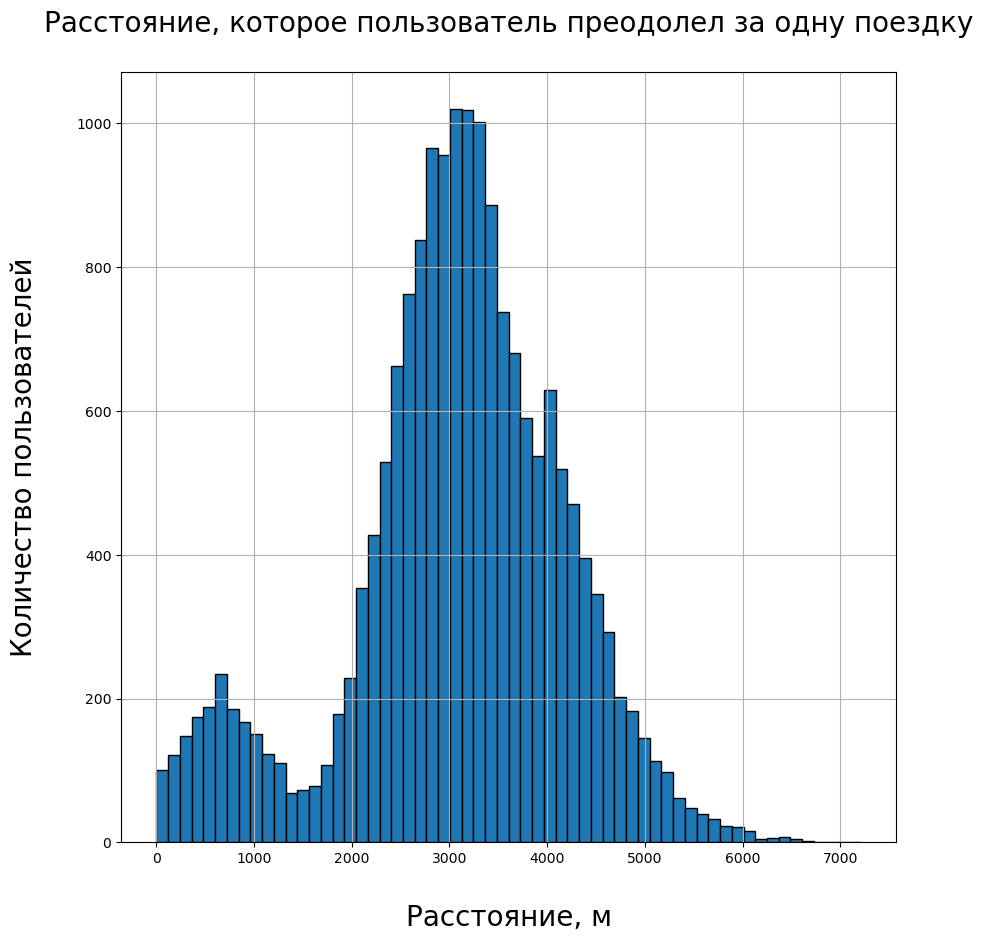

In [59]:
plt.figure(figsize=(10,10))
plt.hist(data_riders_go['distance'], bins=60, edgecolor='black')
plt.title('Расстояние, которое пользователь преодолел за одну поездку' + "\n", size=20)
plt.xlabel("\n" + 'Расстояние, м', size=20)
plt.ylabel('Количество пользователей' + "\n", size=20)
plt.grid()
plt.show()

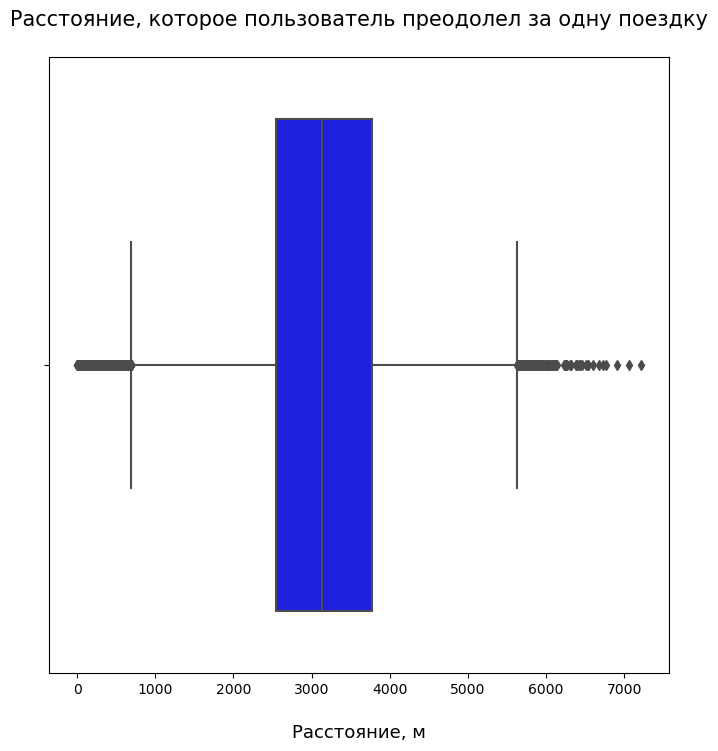

In [60]:
plt.figure(figsize=(8,8))
sns.boxplot(x=data_riders_go['distance'], color='blue')
plt.title('Расстояние, которое пользователь преодолел за одну поездку' + "\n", size=15)
plt.xlabel("\n" + 'Расстояние, м', size=13)
plt.show()

Применим метод `describe`, чтобы зафиксировать заметные на гистограмме нюансы распределения в числах:

In [61]:
data_riders_go['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

#### Продолжительность поездок:

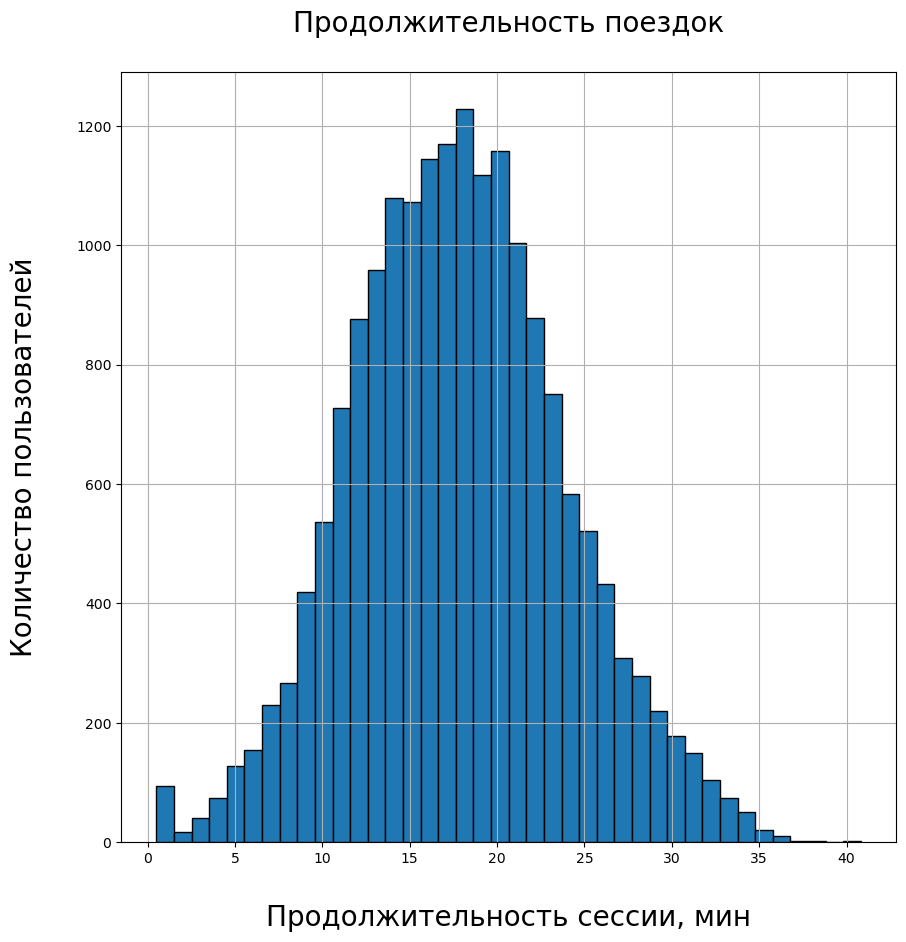

In [62]:
plt.figure(figsize=(10,10))
plt.hist(data_riders_go['duration'], bins=40, edgecolor='black')
plt.title('Продолжительность поездок' + "\n", size=20)
plt.xlabel("\n" + 'Продолжительность сессии, мин', size=20)
plt.ylabel('Количество пользователей' + "\n", size=20)
plt.grid()
plt.show()

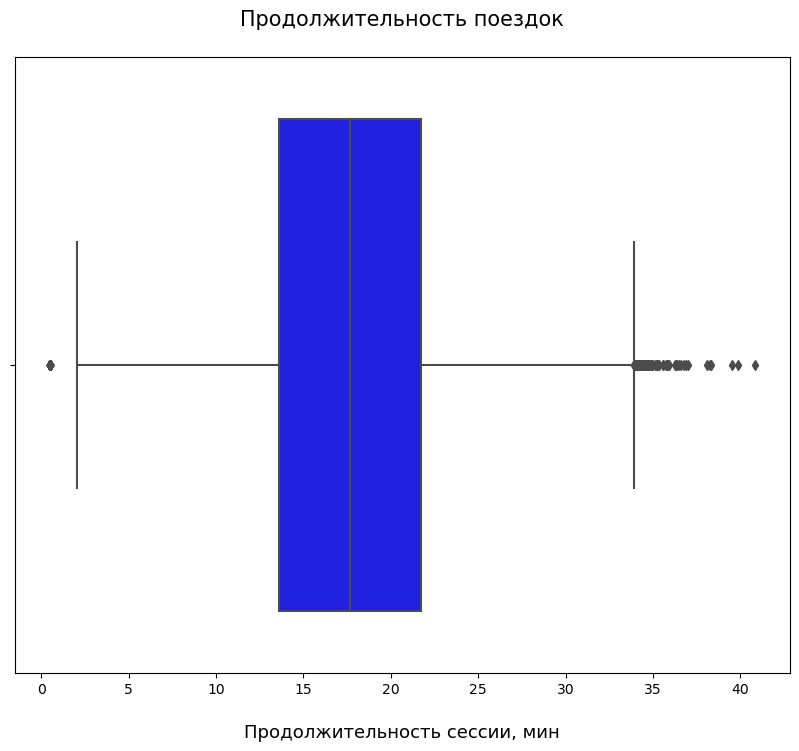

In [63]:
plt.figure(figsize=(10,8))
sns.boxplot(x=data_riders_go['duration'], color='blue')
plt.title('Продолжительность поездок' + "\n", size=15)
plt.xlabel("\n" + 'Продолжительность сессии, мин', size=13)
plt.show()

Применим метод `describe`, чтобы зафиксировать заметные на гистограмме нюансы распределения в числах:

In [64]:
data_riders_go['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

### Вывод после исследовательского анализа данных:

Описали и визуализировали общую информацию о пользователях и поездках, а именно:
* Частота встречаемости городов;
* Соотношение пользователей с подпиской и без подписки;
* Возраст пользователей;
* Расстояние, которое пользователь преодолел за одну поездку;
* Продолжительность поездок.


По данным можно отметить следующие выводы:

* Частота встречаемости городов

  * Количество пользователей по городам распределено примерно одинаково, нет выдающихся значений. Лидером по количеству пользователей является Пятигорск - `219` пользователей. Меньше всего пользователей в Москве - `168`.

* Соотношение пользователей с подпиской и без подписки

  * Пользователей, использующих бесплатную подписку больше - `835` человек, что является ~`54`% от общего числа пользователей. На платной подписке сидит `699` пользователей, что соответственно является ~46%.

* Возраст пользователей

  * Самыми младшими являются пользователи `12`, `13` лет;
  * Самыми старшими - `43`, `39`;
  * Активные пользователи приложения укладываются в промежуток от `20` до `30` лет;
  * Самые активные пользователи возроста `25` лет.

* Расстояние, которое пользователь преодолел за одну поездку

  * Самая короткая дистанция - `0.86` км
  * Расстояние до `1.5` км скорее всего выбросы связанные с технической неинсправностью или человеческим фактором.
  * Самая длинная - `7.2` км
  * В основном пользователи проезжают от `2.5` км до `4` км.

* Продолжительность поездок

  * Самые короткие поездки - по пол минуты - выбросы связанные с технической неинсправностью или человеческим фактором.
  * Самая длинная поездка заняла `40` минут.
  * В основном же длительность поездки состовляет `13` - `22` минут.


## Проведем объединение данных:

### Объединим данные о пользователях, поездках и подписках в один датафрейм:

In [65]:
data_go = data_users_go.merge(data_riders_go)

In [66]:
data_go = data_go.merge(data_subscriptions_go)

In [67]:
def check_stroki(df1, df2, df3, df_itog):
    try:
        if len(df_itog) == (max(len(df1), len(df2), len(df3))):
            print('Проверка размерности до и после объединения прошла успешно!')
        else:
            print('Проверка размерности до и после объединения не пройдена!')
    except:
        print('Произошла ошибка в первой части функции')   

In [68]:
check_stroki(data_users_go, data_riders_go, data_subscriptions_go, data_go)

Проверка размерности до и после объединения прошла успешно!


In [69]:
data_go.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


### Создадим ещё два датафрейма из датафрейма:
* c данными о пользователях без подписки;
* с данными о пользователях с подпиской.


In [70]:
data_subscriptions_go_free = data_go.query("`subscription_type` == 'free'")

In [71]:
data_subscriptions_go_free.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
6505,700,Айдар,22,Омск,free,4342.002254,22.368009,2021-02-23,2,8,50,0
6506,700,Айдар,22,Омск,free,3798.334905,18.243756,2021-03-03,3,8,50,0
6507,700,Айдар,22,Омск,free,2984.551206,15.424899,2021-04-09,4,8,50,0
6508,700,Айдар,22,Омск,free,3360.107141,16.765497,2021-06-12,6,8,50,0
6509,700,Айдар,22,Омск,free,2567.543847,11.312160,2021-06-23,6,8,50,0


In [72]:
data_subscriptions_go_ultra = data_go.query("`subscription_type` == 'ultra'")

In [73]:
data_subscriptions_go_ultra.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий:

#### Визуализируем информацию о расстоянии поездок на бесплатном тарифе:

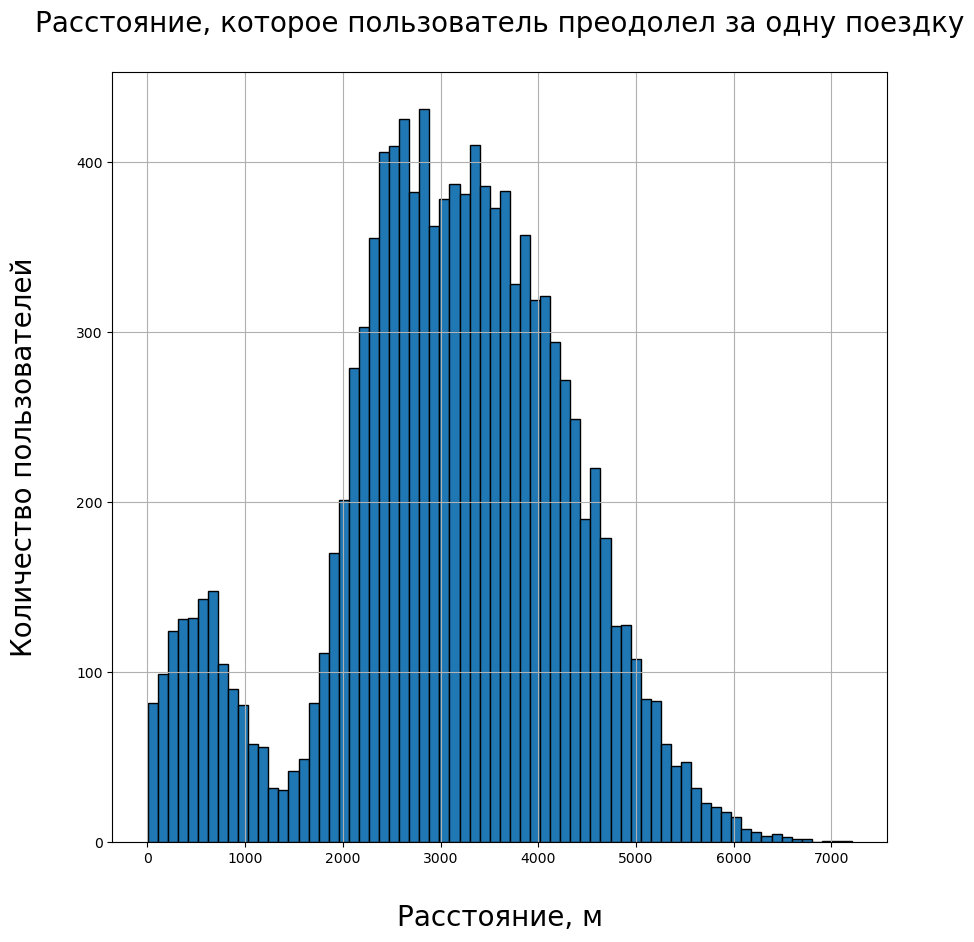

In [74]:
plt.figure(figsize=(10,10))
plt.hist(data_subscriptions_go_free['distance'], bins=70, edgecolor='black')
plt.title('Расстояние, которое пользователь преодолел за одну поездку' + "\n", size=20)
plt.xlabel("\n" + 'Расстояние, м', size=20)
plt.ylabel('Количество пользователей' + "\n", size=20)
plt.grid()
plt.show()

Применим метод `describe`, чтобы зафиксировать заметные на гистограмме нюансы распределения в числах:

In [75]:
data_subscriptions_go_free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

#### Визуализируем информацию о расстоянии поездок на платном тарифе:

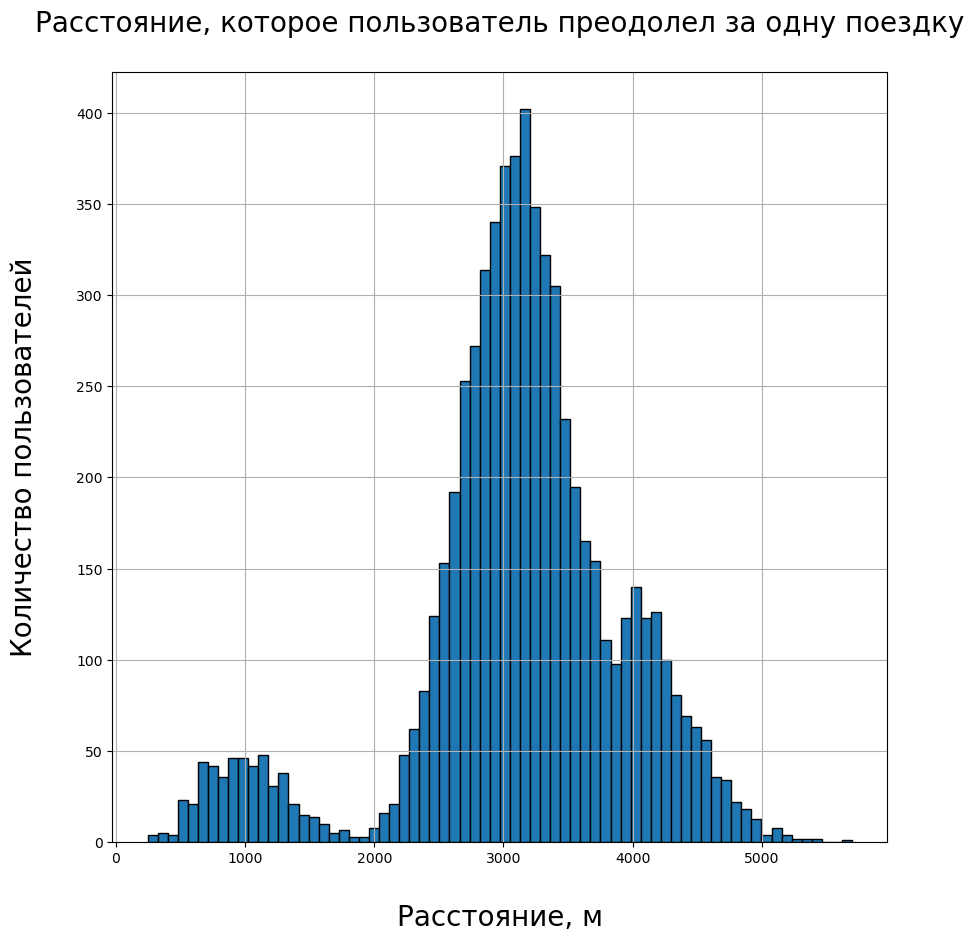

In [76]:
plt.figure(figsize=(10,10))
plt.hist(data_subscriptions_go_ultra['distance'], bins=70, edgecolor='black')
plt.title('Расстояние, которое пользователь преодолел за одну поездку' + "\n", size=20)
plt.xlabel("\n" + 'Расстояние, м', size=20)
plt.ylabel('Количество пользователей' + "\n", size=20)
plt.grid()
plt.show()

Применим метод `describe`, чтобы зафиксировать заметные на гистограмме нюансы распределения в числах:

In [77]:
data_subscriptions_go_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

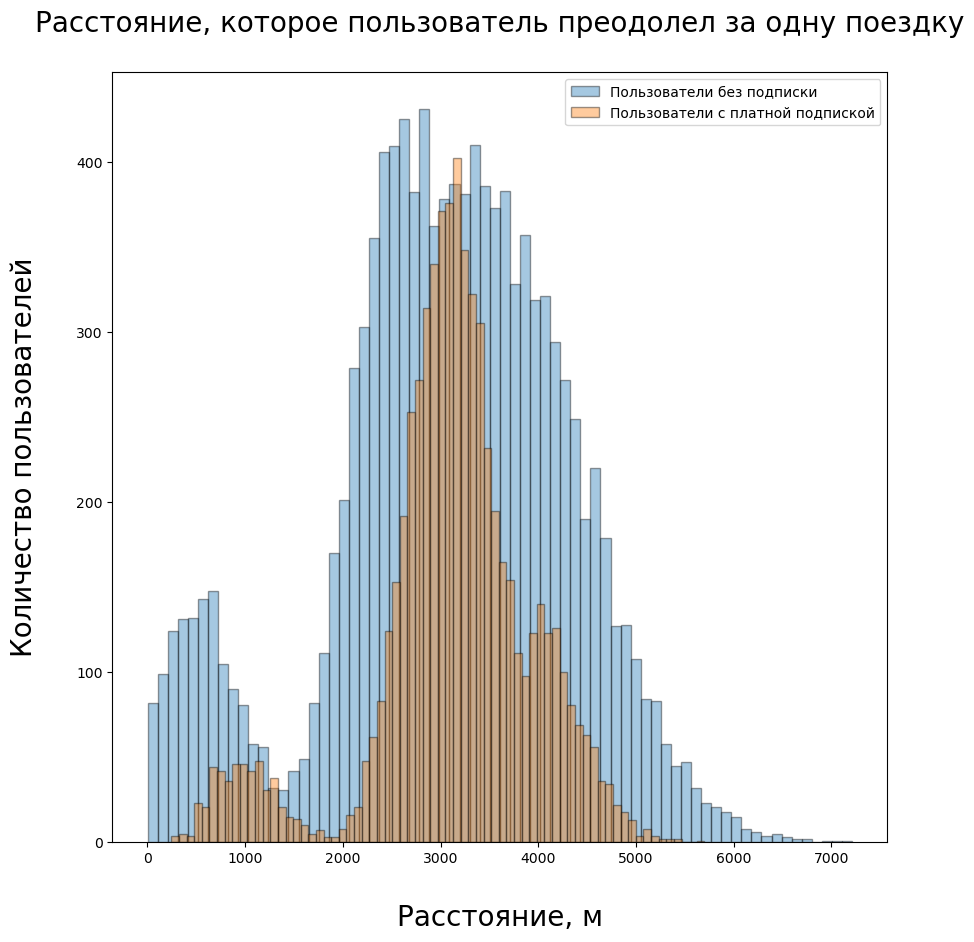

In [78]:
plt.figure(figsize=(10,10))
plt.hist(data_subscriptions_go_free['distance'], bins=70, alpha=0.4, \
         label='Пользователи без подписки', edgecolor='black')
plt.hist(data_subscriptions_go_ultra['distance'], bins=70, alpha=0.4, \
         label='Пользователи с платной подпиской', edgecolor='black')
plt.title('Расстояние, которое пользователь преодолел за одну поездку' + "\n", size=20)
plt.xlabel("\n" + 'Расстояние, м', size=20)
plt.ylabel('Количество пользователей' + "\n", size=20)
plt.legend(loc='upper right')
plt.show()

#### Визуализируем информацию о времени поездок бесплатном тарифе:

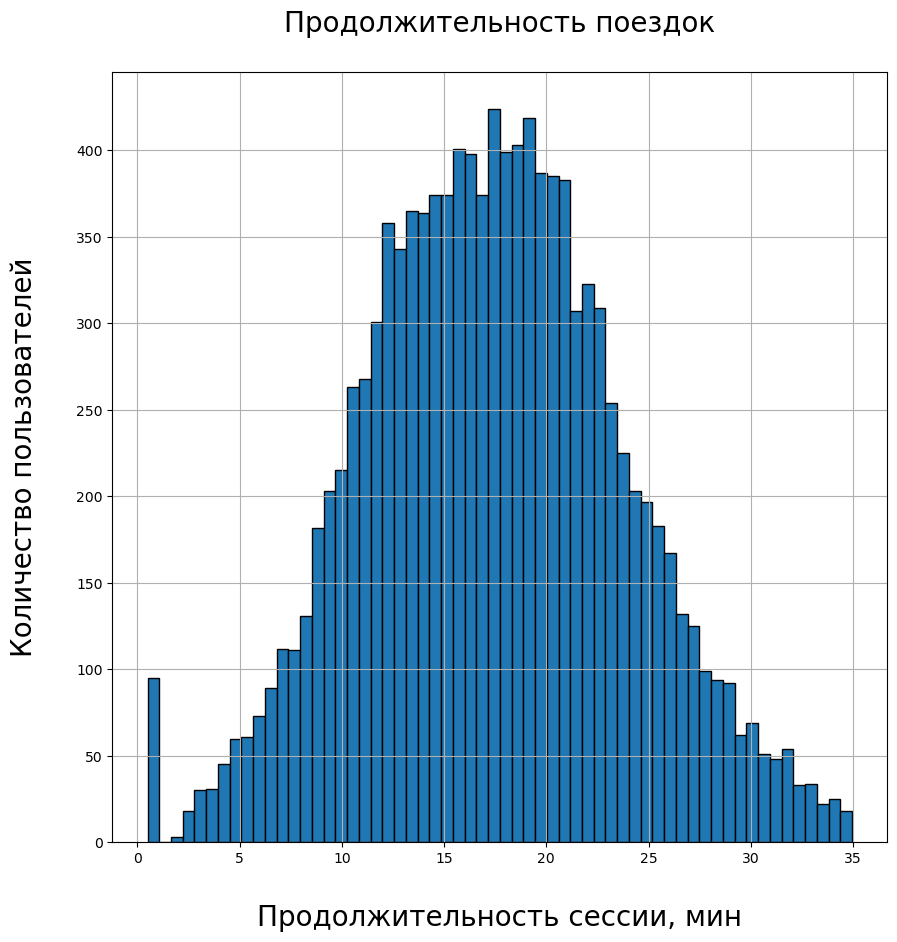

In [79]:
plt.figure(figsize=(10,10))
plt.hist(data_subscriptions_go_free['duration'], bins=60, edgecolor='black')
plt.title('Продолжительность поездок' + "\n", size=20)
plt.xlabel("\n" + 'Продолжительность сессии, мин', size=20)
plt.ylabel('Количество пользователей' + "\n", size=20)
plt.grid()
plt.show()

Применим метод `describe`, чтобы зафиксировать заметные на гистограмме нюансы распределения в числах:

In [80]:
data_subscriptions_go_free['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

#### Визуализируем информацию о времени поездок на платном тарифе:

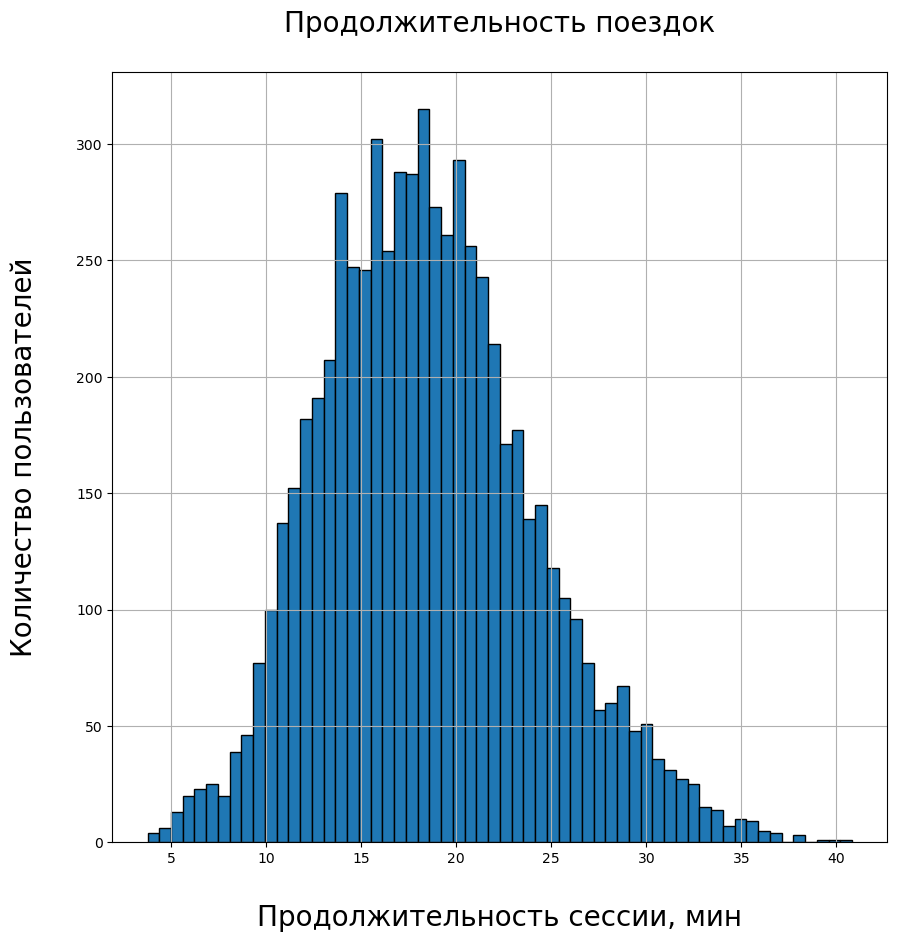

In [81]:
plt.figure(figsize=(10,10))
plt.hist(data_subscriptions_go_ultra['duration'], bins=60, edgecolor='black')
plt.title('Продолжительность поездок' + "\n", size=20)
plt.xlabel("\n" + 'Продолжительность сессии, мин', size=20)
plt.ylabel('Количество пользователей' + "\n", size=20)
plt.grid()
plt.show()

Применим метод `describe`, чтобы зафиксировать заметные на гистограмме нюансы распределения в числах:

In [82]:
data_subscriptions_go_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

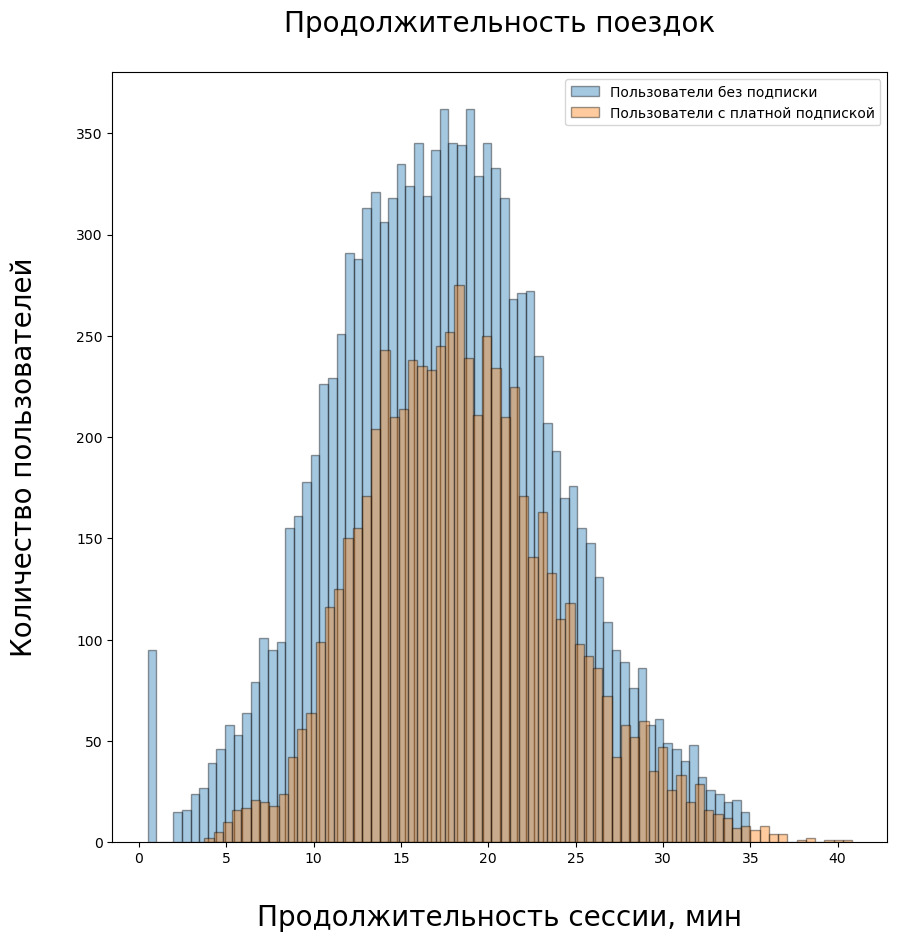

In [83]:
plt.figure(figsize=(10,10))
plt.hist(data_subscriptions_go_free['duration'], bins=70, alpha=0.4, \
         label='Пользователи без подписки', edgecolor='black')
plt.hist(data_subscriptions_go_ultra['duration'], bins=70, alpha=0.4, \
         label='Пользователи с платной подпиской', edgecolor='black')
plt.title('Продолжительность поездок' + "\n", size=20)
plt.xlabel("\n" + 'Продолжительность сессии, мин', size=20)
plt.ylabel('Количество пользователей' + "\n", size=20)
plt.legend(loc='upper right')
plt.show()

### Вывод после объединения данных

* Объединили данные о пользователях, поездках и подписках в один датафрейм (`data_go`).
* Создали ещё два датафрейма из датафрейма (`data_go`):
  * c данными о пользователях без подписки (`data_subscriptions_go_free`);
  * с данными о пользователях с подпиской (`data_subscriptions_go_ultra`).
* Визуализировали информацию о расстоянии и времени поездок для пользователей обеих категорий.

По данным можно отметить следующие выводы:

* Для бесплатного тарифа среднее время поездки составляет от `13` до `21` минут, и в среднем проезжают от `2.3` до `3.9` км.

* Для платного тарифа среднее время поездки составляет от `14` до `21` минут, и в среднем проезжают от `2.7` до `3.5` км.

## Поcчитаем выручку:

### Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из пункта 4 и найдем: 
* суммарное расстояние;
* количество поездок;
* суммарное время

для каждого пользователя за каждый месяц.

In [84]:
agg_data_go = pd.pivot_table(data_go,
                           index=['month', 'user_id'],
                           values = ['distance', 'duration', 'name', 'subscription_type'],
                           aggfunc = {'distance': sum, 
                                      'duration' : sum, 
                                      'name' : 'count', 
                                      'subscription_type' : min})

In [85]:
agg_data_go

distance   duration  name subscription_type
month user_id                                                
1     1        7027.511294  41.416640     2             ultra
      3        3061.777147  12.654443     1             ultra
      5        3914.646990  12.395153     1             ultra
      7        6478.080979  27.653450     2             ultra
      12       3577.151148  32.462907     1             ultra
...                    ...        ...   ...               ...
12    1525     4597.854350  33.220866     1              free
      1526     3644.121544  22.665456     1              free
      1528     3998.569324  10.272902     1              free
      1532     6111.889853  40.128222     2              free
      1534     2371.711192  15.893917     1              free

[11331 rows x 4 columns]

In [86]:
agg_data_go.rename(columns = {'name' : 'count_ride'}, inplace = True)

In [87]:
agg_data_go['duration'] = np.ceil(agg_data_go['duration'])

In [88]:
agg_data_go['distance'] = round(agg_data_go['distance'], 2)

In [89]:
agg_data_go.sort_values(by='month').head(20)

distance  duration  count_ride subscription_type
month user_id                                                  
1     1         7027.51      42.0           2             ultra
      1061     12637.25      42.0           3              free
      1063      3276.36      10.0           1              free
      1064      5297.32      15.0           1              free
      1065     14547.10      97.0           4              free
      1066      2809.06      19.0           1              free
      1067      3864.90      22.0           1              free
      1069      7007.08      51.0           3              free
      1071      3635.09      15.0           1              free
      1072      2498.62      11.0           1              free
      1073      2945.80      16.0           1              free
      1074      2814.79      22.0           1              free
      1075      5746.75      28.0           3              free
      1077       114.04      13.0           1              free
      1078      3748.22      19.0           1              free
      1082      7250.12      30.0           2              free
      1083      5848.88      30.0           2              free
      1084      4615.10      25.0           1              free
      1085     11410.55      62.0           3              free
      1086      4044.28      18.0           1              free

### Добавим столбец с помесячной выручкой, которую принёс каждый пользователь:

In [90]:
def profit(row):
    try:
        if row['subscription_type'] == 'ultra':
            return 6 * row['duration'] + 199
        elif row['subscription_type'] == 'free':
            return 8 * row['duration'] + 50 * row['count_ride']
    except:
        print('Произошла ошибка в первой части функции ')
# функция для расчета трат на поездку для каждой категории подписки

In [91]:
agg_data_go['profit_per_month'] = agg_data_go.apply(profit, axis=1)

In [92]:
agg_data_go['profit_per_month'].head(20)

month  user_id
1      1          451.0
       3          277.0
       5          277.0
       7          367.0
       12         397.0
       13         451.0
       14         403.0
       15         433.0
       20         373.0
       22         277.0
       25         301.0
       26         361.0
       30         349.0
       32         349.0
       35         541.0
       42         337.0
       43         481.0
       44         313.0
       45         361.0
       46         319.0
Name: profit_per_month, dtype: float64

### Вывод

Создали датафрейм с агрегированными данными о поездках (`agg_data_go`) на основе датафрейма с объединёнными данными из пункта 4. 

Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

В этот же датафрейм добавили столбец с помесячной выручкой (`profit_per_month`), которую принёс каждый пользователь. Для этого обратились к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округлили до следующего целого числа.

## Проверка гипотез:

### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Проверим гипотезу: пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе.

$H_{0}$: Время (`duration`) пользователей на подписке `ultra = время` (`duration`) пользователей на подписке `free`

$H_{1}$: Время (`duration`) пользователей на подписке `ultra > время` (`duration`) пользователей на подписке `free`

Пороговое значение `alpha = 0.05`

In [93]:
ultra = data_subscriptions_go_ultra['duration'] 

free = data_subscriptions_go_free['duration']

results = st.ttest_ind(ultra, 
                       free,
                       alternative = 'greater')

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.2804098316645613e-34
Отвергаем нулевую гипотезу


Проверили гипотезу, отвергли гипотезу о том, что время поездки пользователей на тарифе `ultra` равно времени поездки пользователей на тарифе `free`.

### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

Проверим гипотезу: пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку.

$H_{0}$: Расстояние (`distance`) пользователей на подписке `ultra = 3130` метров

$H_{1}$: Расстояние (`distance`) пользователей на подписке `ultra < 3130` метров

Пороговое значение `alpha = 0.05`

In [94]:
ultra_distance = data_subscriptions_go_ultra['distance']

interested_value = 3130.0

alpha = .05

results = st.ttest_1samp(
    ultra_distance, 
    interested_value,
    alternative='less')
    
print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.08046311521502145
Не удалось отвергнуть нулевую гипотезу


Проверили гипотезу, мы не можем утверждать, что расстояние, которое проехали пользователи на тарифе `ultra` не превышает `3130` метров.

### Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Проверим гипотезу: помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

$H_{0}$: Выручка (`profit_per_month`) пользователей на подписке `ultra = выручка` (profit_per_month) пользователей на подписке `free`

$H_{1}$: Выручка (`profit_per_month`) пользователей на подписке `ultra > выручка` (profit_per_month) пользователей на подписке `free`

Пороговое значение `alpha = 0.05`

In [95]:
ultra_profit_per_month = agg_data_go.loc[agg_data_go.subscription_type == 'ultra', 'profit_per_month'] 

free_profit_per_month = agg_data_go.loc[agg_data_go.subscription_type == 'free', 'profit_per_month'] 

results = st.ttest_ind(ultra_profit_per_month, 
                       free_profit_per_month,
                       alternative = 'greater')

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

2.8130926188487286e-35
Отвергаем нулевую гипотезу


Проверили гипотезу, отвергли гипотезу о том, что помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

## Общий вывод

Считали CSV-файлы с данными с помощью библиотеки pandas и сохранили их в датафреймы.

Вывели первые строки каждого набора данных. Изучили общую информацию о каждом датафрейме. Загрузили, построили гистограммы и рассмотрели данные.

Люди разных возростов сбалансированны по типам групп подписок.

Привели столбец date к типу даты (`datetime`) pandas.
Создали новый столбец (`month`) с номером месяца на основе столбца `date`.
Проверли наличие пропущенных значений и дубликатов в датафреймах и обработали их.
По данным можно отметить следующие выводы:

Пропущенных данных в таблицах нет.
Дубликаты имеются среди пользователей (`31 строка`), пожертвовали 2-мя % данных и удалили 31 явный дубликат.

Описали и визуализировали общую информацию о пользователях и поездках, а именно:

    * Частота встречаемости городов;
    * Соотношение пользователей с подпиской и без подписки;
    * Возраст пользователей;
    * Расстояние, которое пользователь преодолел за одну поездку;
    * Продолжительность поездок.

По данным можно отметить следующие выводы:

    * Частота встречаемости городов

Количество пользователей по городам распределено примерно одинаково, нет выдающихся значений. Лидером по количеству пользователей является Пятигорск - `219` пользователей. Меньше всего пользователей в Москве - `168`.
Соотношение пользователей с подпиской и без подписки

Пользователей, использующих бесплатную подписку больше - `835` человек, что является `~54%` от общего числа пользователей. На платной подписке сидит `699` пользователей, что соответственно является `~46%`.

    * Возраст пользователей

Самыми младшими являются пользователи `12`, `13` лет;
Самыми старшими - `43`, `39`;
Активные пользователи приложения укладываются в промежуток от `20` до `30` лет;
Самые активные пользователи возроста `25` лет.

    * Расстояние, которое пользователь преодолел за одну поездку

Самая короткая дистанция - `0.86` км
Расстояние до `1,5` км скорее всего выбросы связанные с технической неинсправностью или человеческим фактором.
Самая длинная - `7.2` км
В основном пользователи проезжают от `2.5` км до `4` км.

    * Продолжительность поездок

Самые короткие поездки - по пол минуты - выбросы связанные с технической неинсправностью или человеческим фактором.
Самая длинная поездка заняла `40` минут.
В основном же длительность поездки состовляет `13` - `22` минут.

Объединили данные о пользователях, поездках и подписках в один датафрейм (`data_go`).
Создали ещё два датафрейма из датафрейма (`data_go`):
    * c данными о пользователях без подписки (`data_subscriptions_go_free`);
    * с данными о пользователях с подпиской (`data_subscriptions_go_ultra`).

Визуализировали информацию о расстоянии и времени поездок для пользователей обеих категорий.
По данным можно отметить следующие выводы:

* Для бесплатного тарифа среднее время поездки составляет от `13` до `21` минут, и в среднем проезжают от `2.3` до `3.9` км.

* Для платного тарифа среднее время поездки составляет от `14` до `21` минут, и в среднем проезжают от `2.7` до `3.5` км.

Проверили гипотезы:

    * Пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе
    Отвергли нулевую гипотезу
    * Пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку
    Не удалось отвергнуть нулевую гипотезу
    * Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки
    Отвергли нулевую гипотезу